In [16]:
from filamentlib import VField
import numpy as np
import matplotlib.pyplot as plt


# Test Notebook

## Circle Tests

This first test is supposed to look at the behavior of a particle if the filament didn't itself move

Generally, these tests just serve to be a little unhelpful though as the particles would do weird things and those weird things don't give much information about what works and what doesn't

In [17]:
# Define the filament shape
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
dCircle = lambda t : [-np.sin(t), np.cos(t), t * 0]
circlePoints = np.linspace(0,2*np.pi,1000)

s = np.array(circle(circlePoints))
ds = np.array(dCircle(circlePoints))

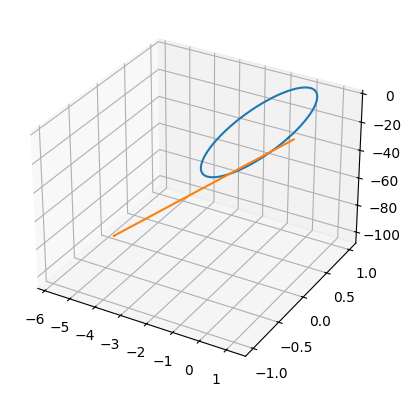

In [18]:
# Set the initial conditions to approximate the field around the curve
TOTAL_TIME = 10
TOTAL_STEPS = 100
IV = np.array([1.2,0,-0.01])

timeSlope = TOTAL_TIME / TOTAL_STEPS
pts = np.zeros([3, TOTAL_STEPS])

# Calculate the behavior of the point as if the filament wouldn't move
pts[:,0] = IV
for step in range(1,TOTAL_STEPS):
    pts[:, step] = pts[:,step - 1] + timeSlope * (VField.BiotSavartPoint(s,ds,pts[:,step - 1]))

# Plot the trajectory on a 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot( s[0,:], s[1,:], s[2,:] )
ax.plot( pts[0,:], pts[1,:], pts[2,:] )
plt.show()

Now, the goal is to show that the field is correct around filaments.

That means that at one slice of time, what is the direction of the field over a range of points

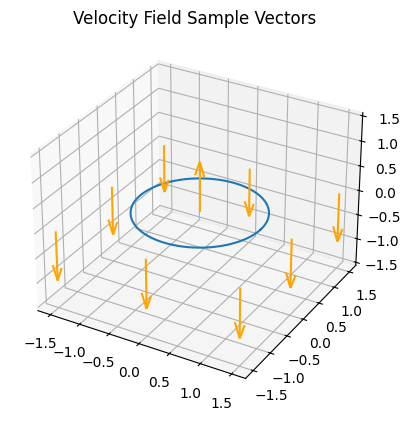

In [19]:
# Generate a bunch of points around the filament
pts = []
for i in np.linspace(-1.5,1.5,3):
    for j in np.linspace(-1.5,1.5,3):
        pts.append( np.array( [ i,j,0 ] ) )

bsPts = []

for pt in pts:
    bsPts.append( VField.BiotSavartPoint( s, ds, pt ) )

pts = np.array( pts )
bsPts = np.array( bsPts )

# Create a 3D quiver plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(pts[:,0], pts[:,1], pts[:,2], bsPts[:,0], bsPts[:,1], bsPts[:,2], normalize=True, color='orange')

ax.set_zlim([-1.5,1.5])
ax.plot( s[0,:], s[1,:], s[2,:] )
plt.title('Velocity Field Sample Vectors')

plt.show()

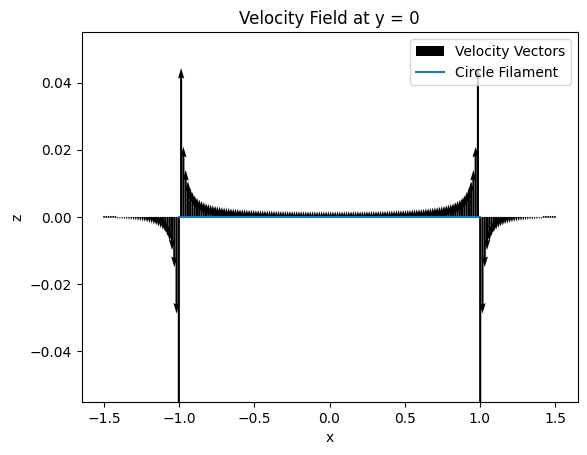

In [20]:
dom = np.linspace(-1.5,1.5,200)
posFunc = lambda t: [ t, t*0, t*0 ]
positions = np.array(posFunc( dom ))

bsPts = []
for i in range( len(positions[0,:]) ):
    bsPts.append(VField.BiotSavartPoint(s,ds,positions[:,i]))

bsPts = np.array(bsPts)

plt.quiver( positions[0,:],positions[2,:],bsPts[:,0],bsPts[:,2] )
plt.plot( s[0,:],s[2,:] )

plt.legend(['Velocity Vectors','Circle Filament'])

plt.title('Velocity Field at y = 0')
plt.ylabel('z')
plt.xlabel('x')
plt.show()

## Ellipse Tests

In [2]:
from filamentlib.VField import VField
import numpy as np
import matplotlib.pyplot as plt

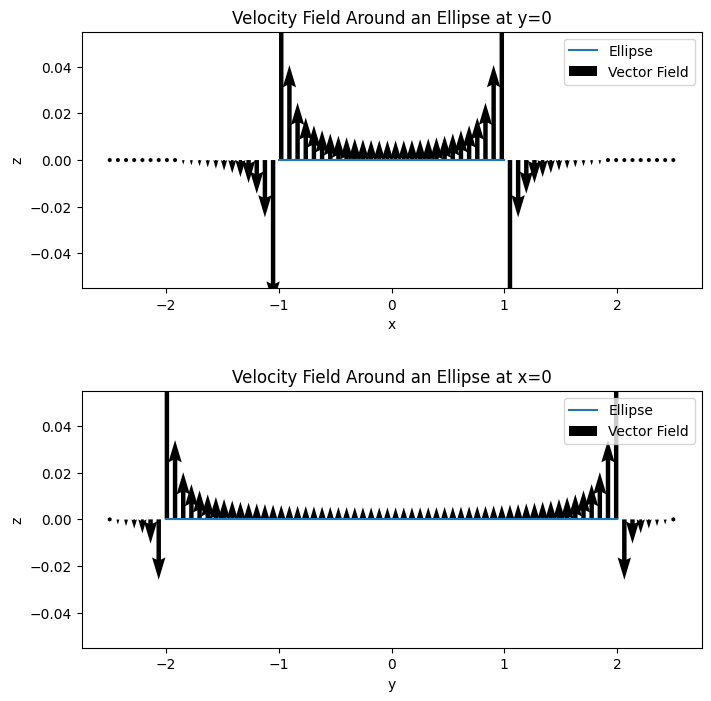

In [15]:
# Make the ellipse functions
E = lambda t: [ np.cos(t), 2 * np.sin(t), t*0 ]
dE = lambda t: [ -np.sin(t), 2 * np.cos(t), t*0 ]
EPoints = np.linspace( 0, 2 * np.pi, 200 )

# Find values on the ellipse
s = np.array( E(EPoints) )
ds = np.array( dE(EPoints) )

# Define the domain to calculate values on the x and y axis of the ellipse
dom = np.linspace(-2.5,2.5,70)

# Find values on y = 0
xPosFunc = lambda t: [ t, t*0, t*0 ]
xPositions = np.array(posFunc( dom ))

# Find values on x = 0
yPosFunc = lambda t: [ t*0, t, t*0 ]
yPositions = np.array(yPosFunc( dom ))

# Measure the VField at those points
bsPtsXAxis = VField.BiotSavartPoints( s, ds, xPositions )
bsPtsYAxis = VField.BiotSavartPoints( s, ds, yPositions )

# Get the plots ready
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# The y = 0 plot
axs[0].plot( s[0,:], s[2,:] )
axs[0].quiver( xPositions[0,:], xPositions[2,:], bsPtsXAxis[:,0], bsPtsXAxis[:,2] )
axs[0].set_title('Velocity Field Around an Ellipse at y=0')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].legend(['Ellipse','Vector Field'])

# The x = 0 plot
axs[1].plot( s[1,:], s[2,:] )
axs[1].quiver( yPositions[1,:], yPositions[2,:], bsPtsYAxis[:,1], bsPtsYAxis[:,2] )
axs[1].set_title('Velocity Field Around an Ellipse at x=0')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].legend(['Ellipse','Vector Field'])

# Plot Styling
plt.subplots_adjust(hspace=0.4)

# Plot the vector values
plt.show()